In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# viewing the columns present in measurement table
insp = inspect(engine)
columns = insp.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

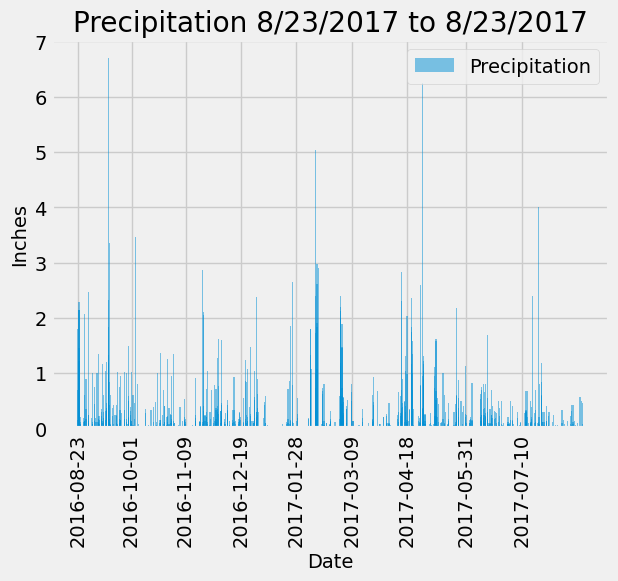

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_precip_query = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.read_sql_query(
    sql = one_year_precip_query.statement,
    con = engine
)

df.rename(columns={'prcp': 'Precipitation', 'date': 'Date'}, inplace = True)

# Sort the dataframe by date
df.sort_values(by = 'Date', ascending = True, inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
x_values = df['Date']
y_values = df['Precipitation']
plt.bar(x_values, y_values, alpha = 0.5,)
tick_list = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']

plt.legend(['Precipitation'])
plt.xticks(tick_list, rotation = 'vertical')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation 8/23/2017 to 8/23/2017')

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = df['Precipitation'].describe()
summary_df.to_frame(name='Precipitation')

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis


In [13]:
# viewing columns present in station table
insp = inspect(engine)
columns = insp.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(most_active_min, most_active_max, most_active_avg)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


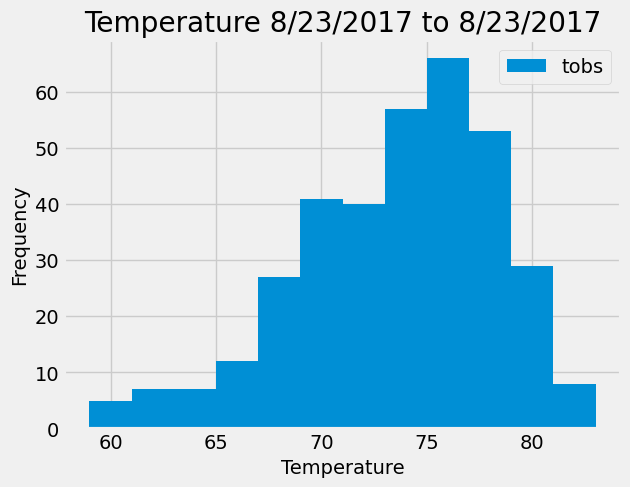

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_temp_query = session.query(Measurement.tobs, Measurement.date).filter\
    (Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').filter(Measurement.station == 'USC00519281')

df2 = pd.read_sql_query(
    sql = one_year_temp_query.statement,
    con = engine
)

df2.rename(columns={'tobs': 'Temperature', 'date': 'Date'}, inplace = True)

x_values = df2['Temperature']
plt.hist(x_values, bins=12)

plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature 8/23/2017 to 8/23/2017')

plt.show()

In [18]:
# Close Session
session.close()